<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Working with Surface Observations in Siphon and MetPy</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://weather-geek.net/images/metar_what.png" alt="METAR" style="height: 200px;"></div>

### Questions
1. What's the best way to get surface station data from a THREDDS data server?
1. What's the best way to make a station plot of data?
1. How can I request a time series of data for a single station?

### Objectives
1. <a href="#metar">Getting METARs from THREDDS</a>
1. <a href="#parse">Parse the Data</a>
1. <a href="#stationplot">Making a Station Plot</a>
1. <a href="#timeseries">Time Series Request and Plot</a>

<a name="metar">Getting METARs from THREDDS</a>
## 1. Getting METARs from THREDDS

We can get the current METARS from the THREDDS test server (it's not yet available on the main thredds.ucar.edu). Head over to <a href="https://thredds-test.unidata.ucar.edu/">https://thredds-test.unidata.ucar.edu/</a> and navigate to the NOAAport products and find the files.

In [1]:
from siphon.catalog import TDSCatalog

In [2]:
cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

In [3]:
ds = cat.datasets[0]

In [4]:
# Ideally we would use remote_open, but because of a soon to be fixed bug we
# have to download locally and open that way.
# fobj = ds.remote_open()

In [5]:
ds.download(f'../../../data/{ds.name}')

Open the file and take a look - aren't you glad MetPy can parse this for you?

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="parse"></a>
## 2. Parse the Data
MetPy can parse the METAR data for us into a dataframe that the declarative plotting inface can work with nicely.

In [6]:
from metpy.io import parse_metar_file

In [7]:
df = parse_metar_file(f'../../../data/{ds.name}')

In [8]:
df.head()

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,current_wx1,current_wx2,current_wx3,...,cloud_coverage,air_temperature,dew_point_temperature,altimeter,present_weather,past_weather,past_weather2,air_pressure_at_sea_level,eastward_wind,northward_wind
K27K,K27K,38.233333,-84.433333,289.0,2020-09-04 23:55:00,0.0,0.0,NaN,NaN,NaN,...,4,24.0,17.0,30.00,0,0,0,1015.06,-0.000000e+00,-0.000000
KIPJ,KIPJ,35.470000,-81.170000,267.0,2020-09-04 23:55:00,340.0,5.0,NaN,NaN,NaN,...,8,25.0,19.0,29.99,0,0,0,1014.71,1.710101e+00,-4.698463
KM25,KM25,36.770000,-88.580000,160.0,2020-09-04 23:55:00,320.0,5.0,NaN,NaN,NaN,...,4,23.0,16.0,30.04,0,0,0,1017.03,3.213938e+00,-3.830222
KVER,KVER,38.950000,-92.680000,218.0,2020-09-04 23:55:00,360.0,3.0,NaN,NaN,NaN,...,0,24.0,14.0,30.10,0,0,0,1018.76,7.347881e-16,-3.000000
KLQK,KLQK,34.820000,-82.700000,309.0,2020-09-04 23:55:00,0.0,0.0,NaN,NaN,NaN,...,4,27.0,22.0,29.97,0,0,0,1013.59,-0.000000e+00,-0.000000


Let's take a bit of a closer look at the columns that are available to use as well.

In [9]:
list(df.columns)

['station_id',
 'latitude',
 'longitude',
 'elevation',
 'date_time',
 'wind_direction',
 'wind_speed',
 'current_wx1',
 'current_wx2',
 'current_wx3',
 'low_cloud_type',
 'low_cloud_level',
 'medium_cloud_type',
 'medium_cloud_level',
 'high_cloud_type',
 'high_cloud_level',
 'highest_cloud_type',
 'highest_cloud_level',
 'cloud_coverage',
 'air_temperature',
 'dew_point_temperature',
 'altimeter',
 'present_weather',
 'past_weather',
 'past_weather2',
 'air_pressure_at_sea_level',
 'eastward_wind',
 'northward_wind']

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="stationplot"></a>
## 3. Making a Station Plot

In [10]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs

from metpy.plots.declarative import *

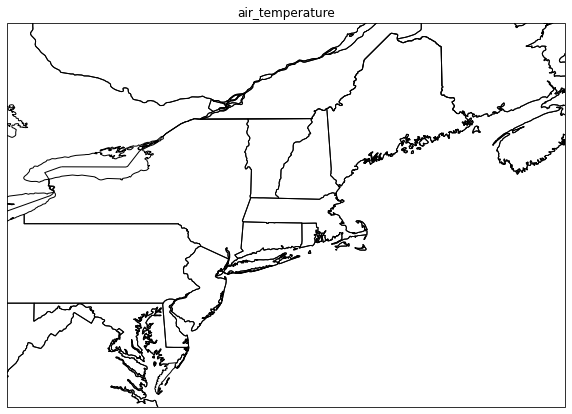

In [11]:
obs = PlotObs()
obs.data = df
obs.time = datetime.utcnow()
obs.level = None
obs.fields = ['air_temperature']
obs.locations = ['NW']
obs.colors = ['tab:red']
obs.formats = [None]
obs.vector_field = ['eastward_wind', 'northward_wind']
obs.reduce_points = 0.5

panel = MapPanel()
panel.area = 'ma'
panel.projection = ccrs.PlateCarree()
panel.layers = ['coastline', 'borders', 'states']

panel.plots = [obs]

pc = PanelContainer()
pc.size = (10, 10)
pc.panels = [panel]

pc.show()

<div class="alert alert-success">
    <b>EXERCISE</b>:

Make a surface plot that plots:

 <ul>
     <li>Temperature in red, NW plot area</li>
     <li>Dewpoint in green, SW plot area</li>
     <li>Altimeter setting in black, NE plot area</li>
     <li>Sky coverage in black, Center plot area</li>
     <li>Set the title to something relevant</li>
</ul>

<b>BONUS: Format the altimeter setting in the "traditional" way (multiply by 10 and show only the last three digits of the integer value). i.e. 1014.56 becomes 145.</b>
</div>

In [12]:
# Make the observation plot

# Make the map panel

# Make the panel container

# Show the plot


<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

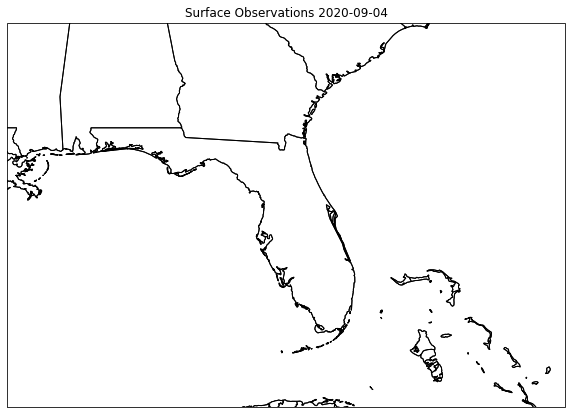

In [13]:
# %load solutions/dec_basic_sfc_plot.py

# Cell content replaced by load magic replacement.
# Make the observation plot
obs = PlotObs()
obs.data = df
obs.time = datetime.utcnow()
obs.level = None
obs.fields = ['air_temperature', 'dew_point_temperature', 'altimeter', 'cloud_coverage']
obs.locations = ['NW', 'SW', 'NE', 'C']
obs.colors = ['tab:red', 'tab:green', 'black', 'black']
obs.formats = [None, None, lambda v: format(10 * v, '.0f')[-3:], 'sky_cover']
obs.vector_field = ['eastward_wind', 'northward_wind']
obs.reduce_points = 1

# Make the map panel
panel = MapPanel()
panel.area = 'fl'
panel.projection = ccrs.PlateCarree()
panel.layers = ['coastline', 'borders', 'states']
panel.plots = [obs]
panel.title = f'Surface Observations {datetime.utcnow():%Y-%m-%d}'

# Make the panel container
pc = PanelContainer()
pc.size = (10, 10)
pc.panels = [panel]

# Show the plot
pc.show()


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="timeseries"></a>
## 4. Time Series Request and Plot
Let's say we want the past days worth of data for a lat/lon point for the variables mean sea level pressure, air temperature, wind direction, and wind speed. We do not have time series plots in a declarative way yet, but these plots are relatively straight forward to create and it's another way we can query THREDDS to get data.

In [14]:
metar_cat_url = ('http://thredds.ucar.edu/thredds/catalog/'
                 'irma/metar/catalog.xml?dataset=irma/metar/Metar_Station_Data_-_Irma_fc.cdmr')

catalog = TDSCatalog(metar_cat_url)

metar_dataset = catalog.datasets['Feature Collection']

ncss = metar_dataset.subset()

In [15]:
# Define the time range we are interested in
end_time = datetime(2017, 9, 12, 0)
start_time = end_time - timedelta(days=2)

# Build the query
query = ncss.query()
query.lonlat_point(-80.25, 25.8)
query.time_range(start_time, end_time)
query.variables('altimeter_setting', 'temperature', 'dewpoint',
                'wind_direction', 'wind_speed')
query.accept('csv')

var=altimeter_setting&var=wind_direction&var=dewpoint&var=temperature&var=wind_speed&time_start=2017-09-10T00%3A00%3A00&time_end=2017-09-12T00%3A00%3A00&longitude=-80.25&latitude=25.8&accept=csv

In [16]:
# Get the data
data = ncss.get_data(query)

/home/travis/miniconda/envs/unidata/lib/python3.7/site-packages/siphon/ncss.py:433: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  converters={'date': lambda s: parse_iso_date(s.decode('utf-8'))})


In [17]:
# Make sure we got what we asked for
print(list(data.keys()))

['time', 'station', 'latitude', 'longitude', 'altimeter_setting', 'wind_direction', 'dewpoint', 'temperature', 'wind_speed']


### Cleanup the Data

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(data)

In [20]:
df.head()

,time,station,latitude,longitude,altimeter_setting,wind_direction,dewpoint,temperature,wind_speed
0,b'2017-09-10T00:13:00Z',b'KMIA',25.799,-80.279,1003.72560,70.0,23.0,25.0,10.803333
1,b'2017-09-10T00:19:00Z',b'KMIA',25.799,-80.279,1003.72560,70.0,23.0,26.0,9.260000
2,b'2017-09-10T00:19:00Z',b'KMIA',25.799,-80.279,1003.72560,70.0,23.0,26.0,9.260000
3,b'2017-09-10T00:44:00Z',b'KMIA',25.799,-80.279,1003.72560,80.0,23.0,26.0,9.774445
4,b'2017-09-10T00:50:00Z',b'KMIA',25.799,-80.279,1003.38696,70.0,23.0,26.0,9.260000


In [21]:
# Parse the date time stamps
df['time'] = pd.to_datetime(df['time'].str.decode('utf-8'), infer_datetime_format=True)

In [22]:
df.head()

,time,station,latitude,longitude,altimeter_setting,wind_direction,dewpoint,temperature,wind_speed
0,2017-09-10 00:13:00,b'KMIA',25.799,-80.279,1003.72560,70.0,23.0,25.0,10.803333
1,2017-09-10 00:19:00,b'KMIA',25.799,-80.279,1003.72560,70.0,23.0,26.0,9.260000
2,2017-09-10 00:19:00,b'KMIA',25.799,-80.279,1003.72560,70.0,23.0,26.0,9.260000
3,2017-09-10 00:44:00,b'KMIA',25.799,-80.279,1003.72560,80.0,23.0,26.0,9.774445
4,2017-09-10 00:50:00,b'KMIA',25.799,-80.279,1003.38696,70.0,23.0,26.0,9.260000


In [23]:
# Station names are bytes, we need to convert them to strings
df['station'] = df['station'].str.decode('utf-8')

In [24]:
df.head()

,time,station,latitude,longitude,altimeter_setting,wind_direction,dewpoint,temperature,wind_speed
0,2017-09-10 00:13:00,KMIA,25.799,-80.279,1003.72560,70.0,23.0,25.0,10.803333
1,2017-09-10 00:19:00,KMIA,25.799,-80.279,1003.72560,70.0,23.0,26.0,9.260000
2,2017-09-10 00:19:00,KMIA,25.799,-80.279,1003.72560,70.0,23.0,26.0,9.260000
3,2017-09-10 00:44:00,KMIA,25.799,-80.279,1003.72560,80.0,23.0,26.0,9.774445
4,2017-09-10 00:50:00,KMIA,25.799,-80.279,1003.38696,70.0,23.0,26.0,9.260000


### Make a Time Series Plot

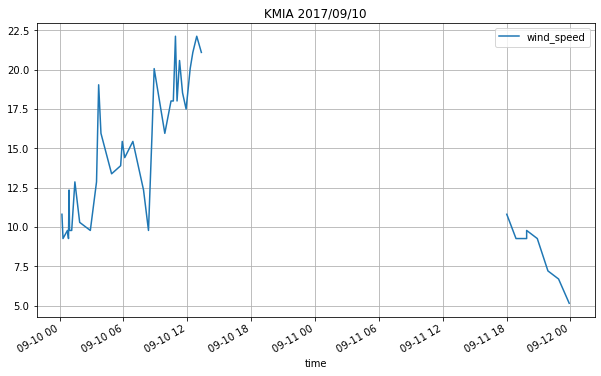

In [25]:
ax = df.plot(x='time', y='wind_speed',
             title=f"{df['station'][0]} {df['time'][0]:%Y/%m/%d}",
             grid=True,
             figsize=(10, 6))

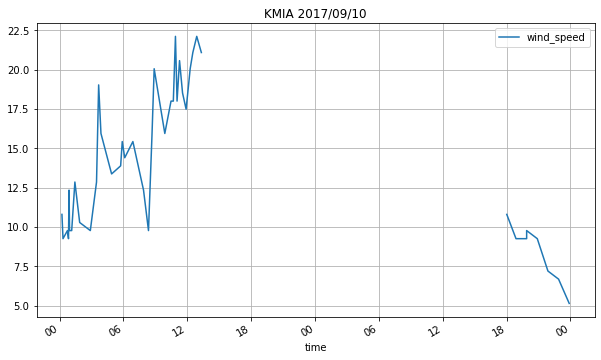

In [26]:
from matplotlib.dates import DateFormatter, AutoDateLocator
# Improve on the default ticking
locator = AutoDateLocator()
hoursFmt = DateFormatter('%H')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(hoursFmt)
fig = ax.get_figure()
fig

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
        <li>Pick a different location.</li>
        <li>Plot temperature and dewpoint together on the same plot.</li>
        <li>Use ax.set.xlabel and the corresponding y label to set sensible labels.</li>
    </ul>
</div>

In [27]:
# Your code goes here


/home/travis/miniconda/envs/unidata/lib/python3.7/site-packages/siphon/ncss.py:433: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  converters={'date': lambda s: parse_iso_date(s.decode('utf-8'))})


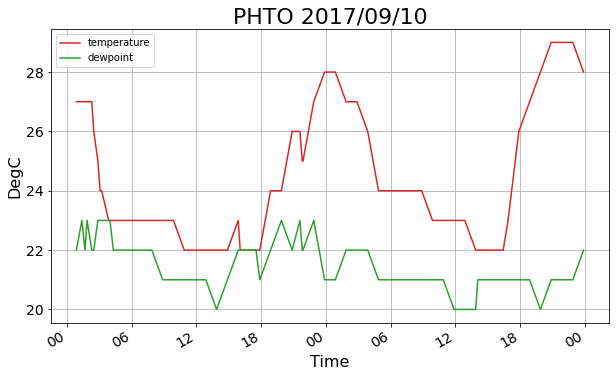

In [28]:
# %load solutions/pd_time_series.py

# Cell content replaced by load magic replacement.
# define the time range we are interested in
end_time = datetime(2017, 9, 12, 0)
start_time = end_time - timedelta(days=2)

# build the query
query = ncss.query()
query.lonlat_point(-155.1, 19.7)
query.time_range(start_time, end_time)
query.variables('altimeter_setting', 'temperature', 'dewpoint',
                'wind_direction', 'wind_speed')
query.accept('csv')

data = ncss.get_data(query)

df = pd.DataFrame(data)

# Parse the date time stamps
df['time'] = pd.to_datetime(df['time'].str.decode('utf-8'), infer_datetime_format=True)

# Station names are bytes, we need to convert them to strings
df['station'] = df['station'].str.decode('utf-8')

# Make the plot
ax = df.plot(x='time', y=['temperature', 'dewpoint'],
             color=['tab:red', 'tab:green'],
             grid=True,
             figsize=(10,6),
             fontsize=14)

# Set good labels
ax.set_xlabel('Time', fontsize=16)
ax.set_ylabel('DegC', fontsize=16)
ax.set_title(f"{df['station'][0]} {df['time'][0]:%Y/%m/%d}", fontsize=22)

# Improve on the default ticking
locator = AutoDateLocator()
hoursFmt = DateFormatter('%H')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(hoursFmt)

<a href="#top">Top</a>
<hr style="height:2px;">